In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import NMF
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')
import pandas as pd
import glob
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jillian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jillian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading in documents

In [2]:
ls_documents=[]
for file in glob.glob('Starfinder_txt/*.txt'):
    ls_documents.append(file)

In [3]:
ls_documents

['Starfinder_txt/Dead Suns - 1- Incident at Absalom Station.txt',
 'Starfinder_txt/Signal of Screams - 02 - The Penumbra Protocol.txt',
 'Starfinder_txt/Dead Suns - 5 - The Thirteenth Gate.txt',
 'Starfinder_txt/Dawn of Flame - 05 - Solar Strike.txt',
 'Starfinder_txt/Against the Aeon Throne - 02 - Escape from the Prison Moon.txt',
 'Starfinder_txt/Dead Suns - 6 - Empire of Bones.txt',
 'Starfinder_txt/The Threefold Conspiracy - Part 2 of 6 - Flight of the Sleepers.txt',
 'Starfinder_txt/Attack of the Swarm 05 - Hive of Minds.txt',
 'Starfinder_txt/Against the Aeon Throne - 01 - The Reach of Empire.txt',
 'Starfinder_txt/The Threefold Conspiracy - Part 1 of 6 - The Chimera Mystery.txt',
 'Starfinder_txt/Dawn of Flame - 03 - Sundivers.txt',
 'Starfinder_txt/Attack of the Swarm 04 - The Forever Reliquary.txt',
 'Starfinder_txt/Attack of the Swarm 06 - The God-Host Ascends.txt',
 "Starfinder_txt/The Threefold Conspiracy - Part 3 of 6 - Deceivers' Moon.txt",
 'Starfinder_txt/The Threefold 

In [4]:
#making sure all documents loaded
len(ls_documents)

33

In [5]:
#creating list of all text from each document
ls_text=[]
for file in ls_documents:
    f=open(file,'r')
    ls_text.append(f.read())

In [6]:
#Creating Initial Dataframe
df_text=pd.DataFrame(ls_text)
df_text.columns=['raw_text']
df_text['source']=['Dead_Suns_1','Signal_of_Screams_2','Dead_Suns_5','Dawn_of_Flame_5',
                   'Against_the_Aeon_Throne_2','Dead_Suns_6','Threefold_Conspiracy_2',
                   'Attack_of_the_Swarm_5','Against_the_Aeon_Throne_1','Threefold_Conspiracy_1',
                   'Dawn_of_Flame_3','Attack_of_the_Swarm_4','Attack_of_the_Swarm_6',
                   'Threefold_Conspiracy_3','Threefold_Conspiracy_4','Dead_Suns_4',
                   'Attack_of_the_Swarm_1','Threefold_Conspiracy_5','Threefold_Conspiracy_6',
                   'Attack_of_the_Swarm_2','Dead_Suns_3','Dawn_of_Flame_1','Dawn_of_Flame_4',
                   'Attack_of_the_Swarm_3','Devastation_Ark_1','Devastation_Ark_2',
                   'Devastation_Ark_3','Against_the_Aeon_Throne_3','Dawn_of_Flame_2',
                   'Signal_of_Screams_3','Signal_of_Screams_1','Dawn_of_Flame_6','Dead_Suns_2']


# Seperating documents into smaller pieces
After testing breaking by sentences, paragraphs, and sections decided to work with sections
Due to formatting of text subsections were easier to discern than individual chapters

In [7]:
#df_text['para'] = df_text.raw_text.str.split('\n\n')
df_text['sect'] = df_text.raw_text.str.split(r'\n\n[A-Z ]*\n')
df_text=df_text.explode('sect')
#df_text=df_text.explode('para')
df_text=df_text.set_index('source')
df_text

raw_text  \
source                                                           
Dead_Suns_1  SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...   
Dead_Suns_1  SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...   
Dead_Suns_1  SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...   
Dead_Suns_1  SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...   
Dead_Suns_1  SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...   
...                                                        ...   
Dead_Suns_2  THAUMTECH\nCAIRNCARVER\n\nTIER 2\n\nSmall ligh...   
Dead_Suns_2  THAUMTECH\nCAIRNCARVER\n\nTIER 2\n\nSmall ligh...   
Dead_Suns_2  THAUMTECH\nCAIRNCARVER\n\nTIER 2\n\nSmall ligh...   
Dead_Suns_2  THAUMTECH\nCAIRNCARVER\n\nTIER 2\n\nSmall ligh...   
Dead_Suns_2  THAUMTECH\nCAIRNCARVER\n\nTIER 2\n\nSmall ligh...   

                                                          sect  
source                                                          
Dead_Suns_1                                     SUNRISE MAIDEN  
Dead_Suns_1  TIER 3\n\nSanjaval Vagabond\nMedium explorer\n...  
Dead_Suns_1  SUNRISE MAIDEN MAP KEY\n1. Bridge\na. Pilot’s ...  
Dead_Suns_1  \nFORTUNE IN THE STARS\n\nTake your station, c...  
Dead_Suns_1  The Starfinder Adventure Path is designed to p...  
...                                                        ...  
Dead_Suns_2                                                  8  
Dead_Suns_2                                              4,800  
Dead_Suns_2  \nBulldoze (Ex) When a yaruk uses its trample ...  
Dead_Suns_2  Yaruks are immense herbivores that can readily...  
Dead_Suns_2  RATHEREN\nMoon Base of Desperate Survivors\nDi...  

[6558 rows x 2 columns]

In [8]:
#saving copy of base dataframe 
df_text.to_pickle('primary_df.pkl')

In [9]:
#testing sectioning
df_text.sect.iloc[2]

'SUNRISE MAIDEN MAP KEY\n1. Bridge\na. Pilot’s station\nb. Captain’s station\nc. Engineering station/auxiliary gunnery station\nd. Science station/auxiliary gunnery station\n2. Gunnery stations\n3. Main airlock\n4. Crew storage\n5. Dorsal turret access\n6. Captain’s quarters\n7. Maintenance access points\n8. Crew quarters\n9. Lavatories\n10. Recreation suite\n11. Escape pods\n12. Port cargo hold\n13. Starboard cargo hold\n14. Galley\n15. Crew lounge/dining room\n16. Main engineering\n17. Drift engine\n18. Power core\n19. Auxiliary airlock'

# EDA of whole documents

In [10]:
#creating dataframe of whole documents
text=pd.DataFrame(ls_text)
text.columns=['raw_text']
text['source']=['Dead_Suns_1','Signal_of_Screams_2','Dead_Suns_5','Dawn_of_Flame_5',
                   'Against_the_Aeon_Throne_2','Dead_Suns_6','Threefold_Conspiracy_2',
                   'Attack_of_the_Swarm_5','Against_the_Aeon_Throne_1','Threefold_Conspiracy_1',
                   'Dawn_of_Flame_3','Attack_of_the_Swarm_4','Attack_of_the_Swarm_6',
                   'Threefold_Conspiracy_3','Threefold_Conspiracy_4','Dead_Suns_4',
                   'Attack_of_the_Swarm_1','Threefold_Conspiracy_5','Threefold_Conspiracy_6',
                   'Attack_of_the_Swarm_2','Dead_Suns_3','Dawn_of_Flame_1','Dawn_of_Flame_4',
                   'Attack_of_the_Swarm_3','Devastation_Ark_1','Devastation_Ark_2',
                   'Devastation_Ark_3','Against_the_Aeon_Throne_3','Dawn_of_Flame_2',
                   'Signal_of_Screams_3','Signal_of_Screams_1','Dawn_of_Flame_6','Dead_Suns_2']

In [11]:
text=text.set_index('source')
text

raw_text
source                                                                      
Dead_Suns_1                SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...
Signal_of_Screams_2        ANTUMBRA OVERSEER\n\nTIER 8\n\nLarge destroyer...
Dead_Suns_5                MODIFIED ATECH BULWARK\n\nTIER 7\n\nLarge dest...
Dawn_of_Flame_5            PROTECTOR ACCORD\n\nTIER 4\n\nSmall shuttle\nS...
Against_the_Aeon_Throne_2  VANGUARD PARAPET\t\t\n\nTIER 3\n\nMedium trans...
Dead_Suns_6                BLACKWIND ANNIHILATOR\n\nTIER 20\n\nSupercolos...
Threefold_Conspiracy_2     STEWARD BANSHEE FA FRIGATE\n\nTIER 5\n\nMedium...
Attack_of_the_Swarm_5      SUSKILLON AURORA\n\nTIER 10\n\nHuge cruiser\nS...
Against_the_Aeon_Throne_1  VANGUARD VOIDSWEEPER\t\t\n\nTIER 2\n\nMedium e...
Threefold_Conspiracy_1     SANJAVAL PALANQUIN\n\nSanjaval Spaceflight Sys...
Dawn_of_Flame_3            SUN DIVER\n\nTIER 6\n\nSmall light freighter\n...
Attack_of_the_Swarm_4      SDF RAMPART\t\t\n\nTIER 9\n\nLarge destroyer\n...
Attack_of_the_Swarm_6      EP STALWART\n\nTIER 11\n\nHuge cruiser\nSpeed ...
Threefold_Conspiracy_3     GRAY MONITOR CAPSULE\n\nTIER 4\n\nSmall shuttl...
Threefold_Conspiracy_4     ROSELIGHT ORACLE\n\nTIER 7\n\nLarge heavy frei...
Dead_Suns_4                KLOKWORX PRISM\n\nTIER 6\n\nMedium explorer\nS...
Attack_of_the_Swarm_1      TERMINUS WILD\n\nTIER 3\n\nFlux Industries Obs...
Threefold_Conspiracy_5     \nINHERITORWORKS CRUSADER\n\nTIER 9\n\nLarge d...
Threefold_Conspiracy_6     OPULOS AMBASSADOR\n\nTIER 11\n\nMedium transpo...
Attack_of_the_Swarm_2      SUSKILLON WHIP\n\nTIER 5\n\nMedium explorer\nS...
Dead_Suns_3                NEBULOR OUTFITTERS\nSTARHOPPER\n\nTIER 4\n\nMe...
Dawn_of_Flame_1            AURORA YELLOW DWARF\n\nTIER 3\n\nMedium explor...
Dawn_of_Flame_4            PYRE WOEBRINGER\n\nTIER 8\n\nHuge bulk freight...
Attack_of_the_Swarm_3      SDF D-127 DEFENSIVE CARRIER\n\nTIER 7\n\nLarge...
Devastation_Ark_1          NEW HORIZON BOREALIS\n\nTIER 9\n\nLarge Heavy ...
Devastation_Ark_2          SKYWARD GLORY\n\nTIER 10\n\nRefit Inheritorwor...
Devastation_Ark_3          MULTIFOLD INDUSTRIES HARVESTER\n\nTIER 14\n\nG...
Against_the_Aeon_Throne_3  VANGUARD REGNANT\n\nTIER 5\n\nSmall light frei...
Dawn_of_Flame_2            EXCORIATION COMBINE JEZAIL\n\nTIER 6\n\nLarge ...
Signal_of_Screams_3        \nVELSTRAC TORMENTOR\n\nTIER 9\n\nMedium trans...
Signal_of_Screams_1        RINGWORKS SENTINEL\n\nTIER 5\n\nMedium explore...
Dawn_of_Flame_6            \n\nEXCORIATION COMBINE ALCAZAR\n\n\nTIER 10\n...
Dead_Suns_2                THAUMTECH\nCAIRNCARVER\n\nTIER 2\n\nSmall ligh...

In [12]:
#Document cleaning
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, 
    remove punctuation and remove words containing numbers, remove line breaks.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub(r'\b\w{1,2}\b', '',text)
    return text

round1 = lambda x: clean_text(x)

In [13]:
text_clean=pd.DataFrame(text.raw_text.apply(round1))
text_clean

raw_text
source                                                                      
Dead_Suns_1                sunrise maiden   tier    sanjaval vagabond med...
Signal_of_Screams_2        antumbra overseer  tier    large destroyer spe...
Dead_Suns_5                modified atech bulwark  tier    large destroye...
Dawn_of_Flame_5            protector accord  tier    small shuttle speed ...
Against_the_Aeon_Throne_2  vanguard parapet\t\t  tier    medium transport...
Dead_Suns_6                blackwind annihilator  tier    supercolossal u...
Threefold_Conspiracy_2     steward banshee  frigate  tier    medium explo...
Attack_of_the_Swarm_5      suskillon aurora  tier    huge cruiser speed  ...
Against_the_Aeon_Throne_1  vanguard voidsweeper\t\t  tier    medium explo...
Threefold_Conspiracy_1     sanjaval palanquin  sanjaval spaceflight syste...
Dawn_of_Flame_3            sun diver  tier    small light freighter speed...
Attack_of_the_Swarm_4      sdf rampart\t\t  tier    large destroyer speed...
Attack_of_the_Swarm_6       stalwart  tier    huge cruiser speed    maneu...
Threefold_Conspiracy_3     gray monitor capsule  tier    small shuttle sp...
Threefold_Conspiracy_4     roselight oracle  tier    large heavy freighte...
Dead_Suns_4                klokworx prism  tier    medium explorer speed ...
Attack_of_the_Swarm_1      terminus wild  tier    flux industries observa...
Threefold_Conspiracy_5      inheritorworks crusader  tier    large destro...
Threefold_Conspiracy_6     opulos ambassador  tier    medium transport sp...
Attack_of_the_Swarm_2      suskillon whip  tier    medium explorer speed ...
Dead_Suns_3                nebulor outfitters starhopper  tier    medium ...
Dawn_of_Flame_1            aurora yellow dwarf  tier    medium explorer s...
Dawn_of_Flame_4            pyre woebringer  tier    huge bulk freighter s...
Attack_of_the_Swarm_3      sdf    defensive carrier  tier    large heavy ...
Devastation_Ark_1          new horizon borealis  tier    large heavy frei...
Devastation_Ark_2          skyward glory  tier    refit inheritorworks la...
Devastation_Ark_3          multifold industries harvester  tier    gargan...
Against_the_Aeon_Throne_3  vanguard regnant  tier    small light freighte...
Dawn_of_Flame_2            excoriation combine jezail  tier    large dest...
Signal_of_Screams_3         velstrac tormentor  tier    medium transport ...
Signal_of_Screams_1        ringworks sentinel  tier    medium explorer sp...
Dawn_of_Flame_6              excoriation combine alcazar   tier    huge c...
Dead_Suns_2                thaumtech cairncarver  tier    small light fre...

In [14]:
#Stopword removal and vectorization

from sklearn.feature_extraction import text
new_stopwords=['statistics','tactics','ecology','bulk','defense','offense','treasure',
                  'mission','pcs','starfinder',]
stop_words=text.ENGLISH_STOP_WORDS.union(new_stopwords)
vectorizer = CountVectorizer(stop_words=stop_words)
text_vect = vectorizer.fit_transform(text_clean.raw_text)
text_dtm=pd.DataFrame(text_vect.toarray(), columns=vectorizer.get_feature_names()) #doc-term matrix
text_dtm.index=text_clean.index
text_dtm

aanung  abadar  abadaran  abadarans  abadarcorp  \
source                                                                       
Dead_Suns_1                     0       1         0          0           4   
Signal_of_Screams_2             0       0         0          0           2   
Dead_Suns_5                     0       1         0          0           1   
Dawn_of_Flame_5                 0       0         0          0           3   
Against_the_Aeon_Throne_2       0       1         0          0           2   
Dead_Suns_6                     0       0         0          0           0   
Threefold_Conspiracy_2          0       1         0          0           5   
Attack_of_the_Swarm_5           0       1         0          0           0   
Against_the_Aeon_Throne_1       0       7         2          0          15   
Threefold_Conspiracy_1         15       0         0          0           0   
Dawn_of_Flame_3                 0       0         0          0           0   
Attack_of_the_Swarm_4           0       1         0          0           1   
Attack_of_the_Swarm_6           0       0         0          0           0   
Threefold_Conspiracy_3          0       1         0          0           0   
Threefold_Conspiracy_4          0       0         0          0           1   
Dead_Suns_4                     0       0         0          0           1   
Attack_of_the_Swarm_1           0       0         0          0           0   
Threefold_Conspiracy_5          0       0         0          0           2   
Threefold_Conspiracy_6          0       0         0          0           6   
Attack_of_the_Swarm_2           0       0         0          0           0   
Dead_Suns_3                     0       0         0          0           0   
Dawn_of_Flame_1                 0       0         0          0           0   
Dawn_of_Flame_4                 0       1         0          0           3   
Attack_of_the_Swarm_3           0       0         0          0           3   
Devastation_Ark_1               0       0         1          5          67   
Devastation_Ark_2               0       2         0          0          11   
Devastation_Ark_3               0       0         0          0           0   
Against_the_Aeon_Throne_3       0       0         0          0           0   
Dawn_of_Flame_2                 0       0         0          0           1   
Signal_of_Screams_3             0       0         0          0           0   
Signal_of_Screams_1             0       0         0          0           2   
Dawn_of_Flame_6                 0       0         0          0           1   
Dead_Suns_2                     0       0         0          0           0   

                           abaddon  aballon  aballonian  abandon  abandoned  \
source                                                                        
Dead_Suns_1                      0        0           0        0         11   
Signal_of_Screams_2              0        0           0        1          3   
Dead_Suns_5                      0        0           0        0          5   
Dawn_of_Flame_5                  0        0           0        0          2   
Against_the_Aeon_Throne_2        0        0           0        0          6   
Dead_Suns_6                      2        1           0        1          2   
Threefold_Conspiracy_2           0        2           1        0          0   
Attack_of_the_Swarm_5            0        0           0        2          0   
Against_the_Aeon_Throne_1        0        0           0        0          2   
Threefold_Conspiracy_1           0        0           0        3          1   
Dawn_of_Flame_3                  0       16           1        0          3   
Attack_of_the_Swarm_4            0        0           0        1          3   
Attack_of_the_Swarm_6            0        0           0        0          4   
Threefold_Conspiracy_3           0        4           0        1          6   
Threefold_Conspiracy_4          

In [15]:
text_t=text_dtm.transpose() #transposing to make it a bit easier to work with

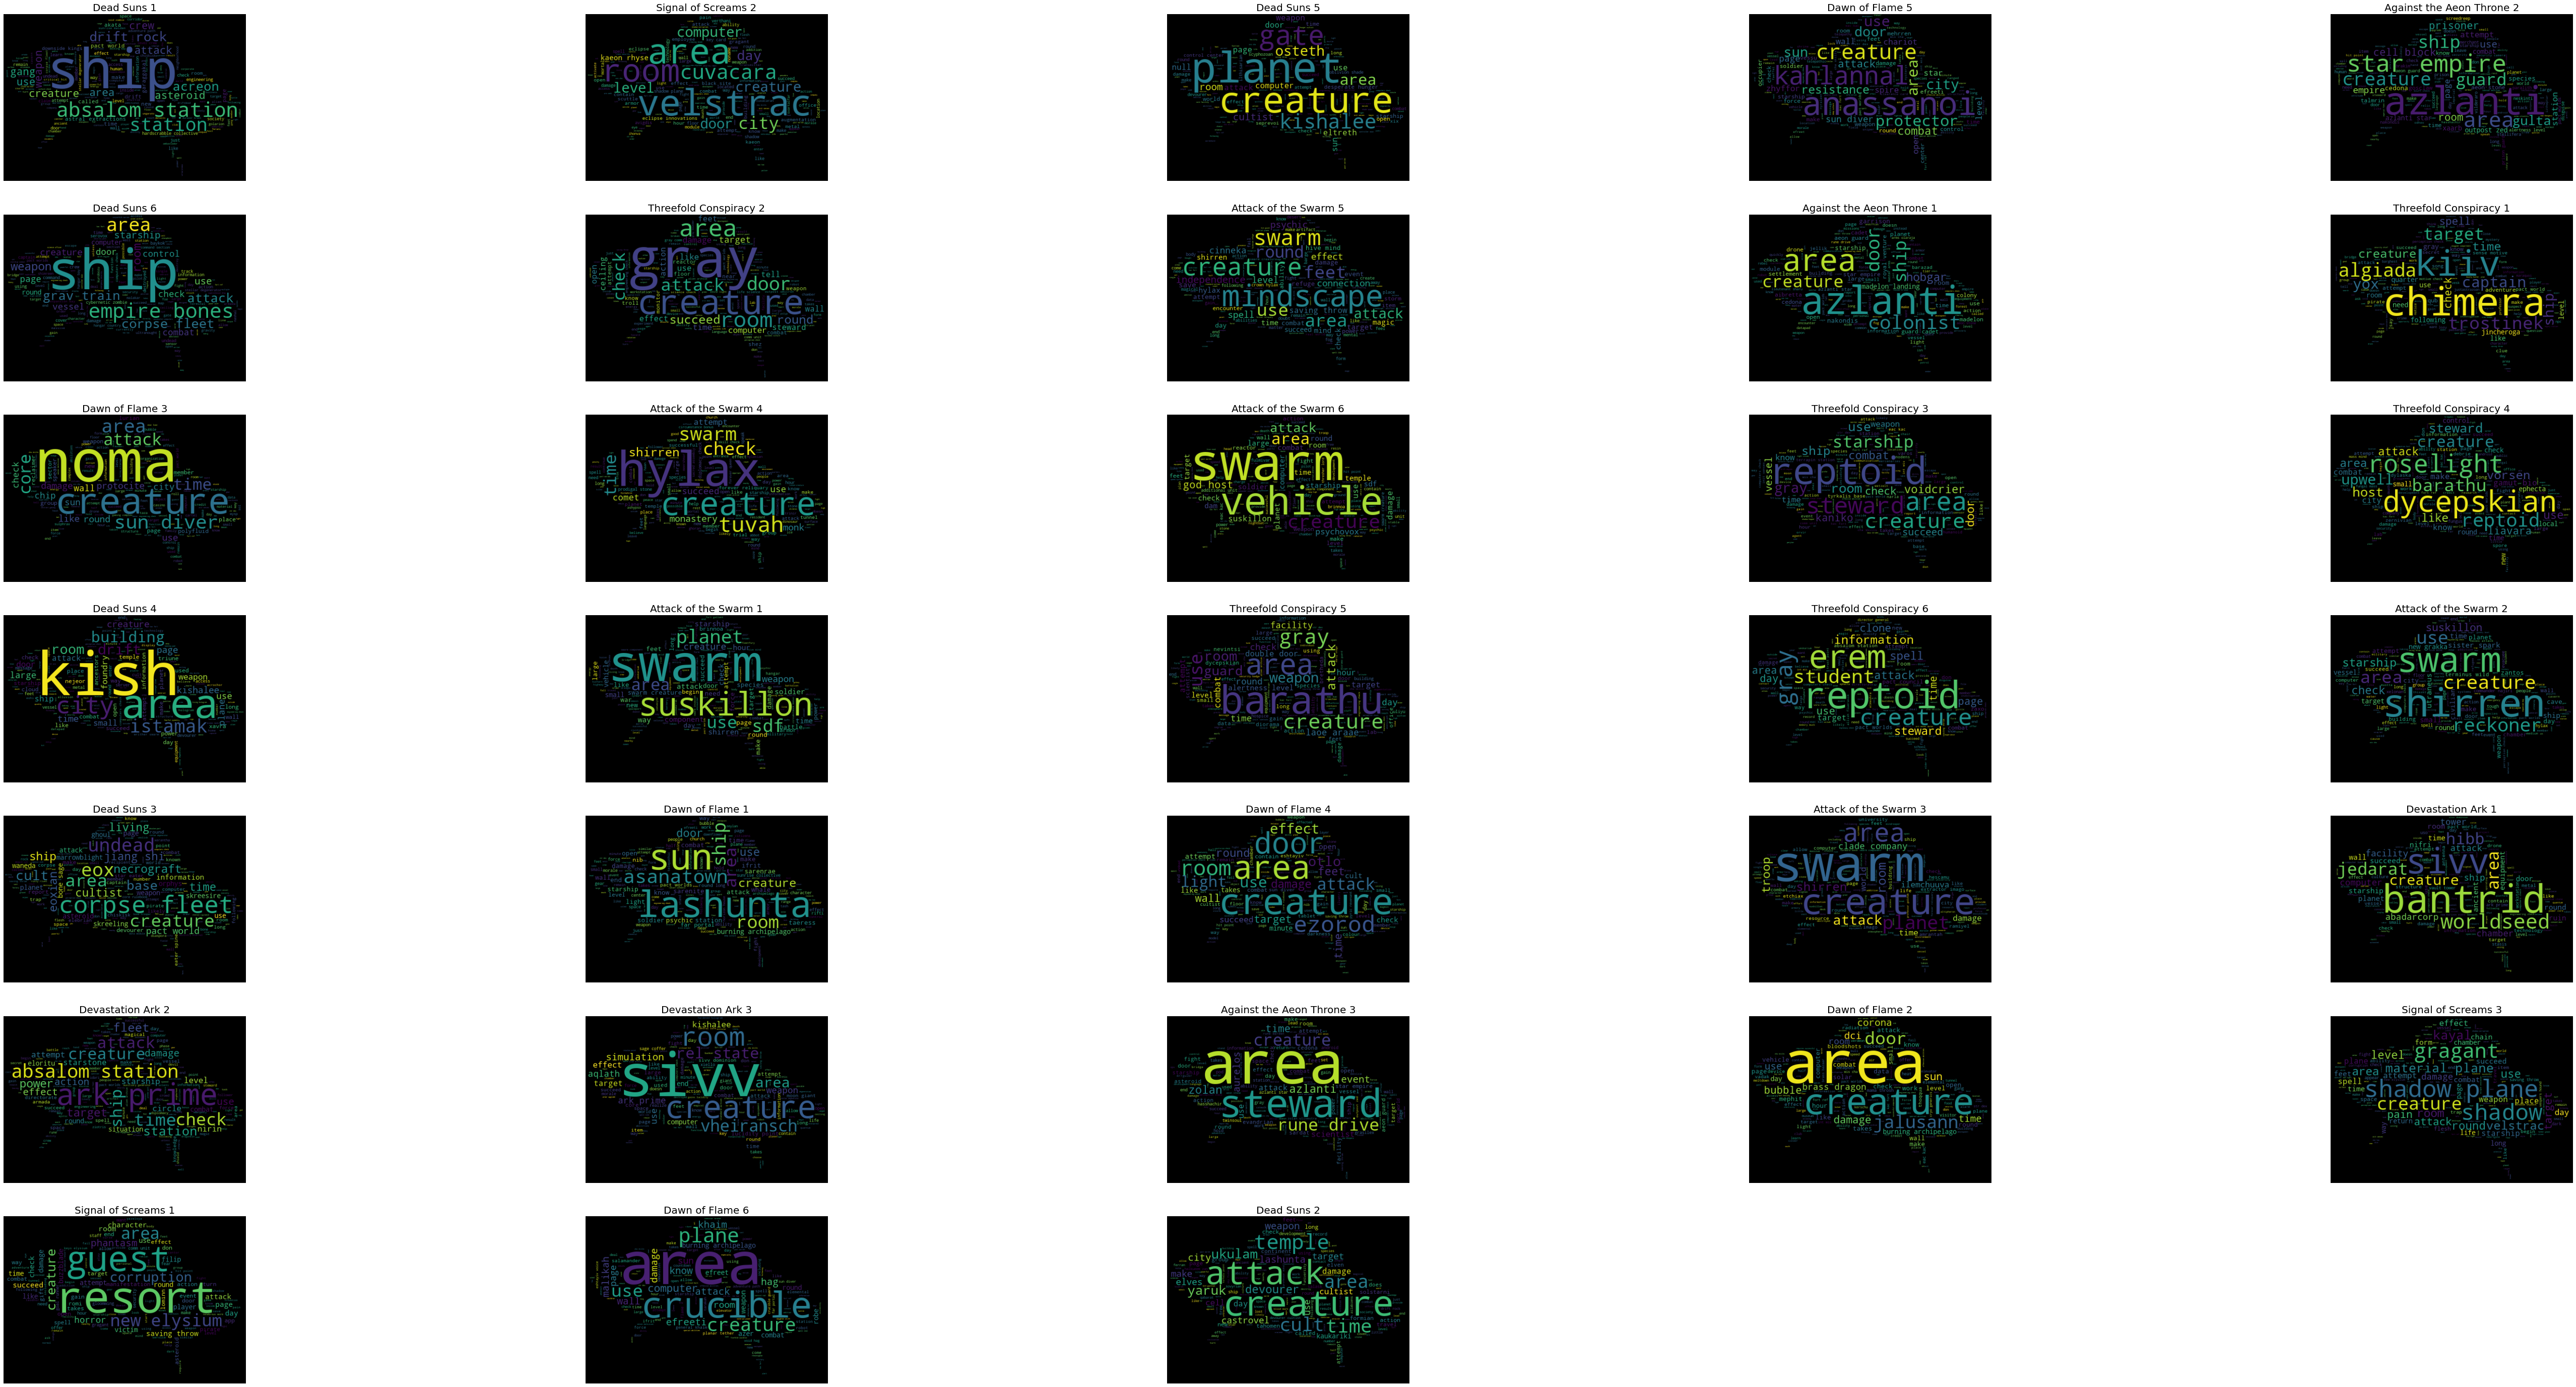

In [55]:
#creating a word cloud for each document for visualization

from wordcloud import WordCloud
from PIL import Image
import numpy as np
mask=np.array(Image.open('ufo.jpg'))
wc=WordCloud(stopwords=stop_words, max_font_size=150,random_state=42, mask=mask)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[100,50]
title=['Dead Suns 1','Signal of Screams 2','Dead Suns 5','Dawn of Flame 5',
                   'Against the Aeon Throne 2','Dead Suns 6','Threefold Conspiracy 2',
                   'Attack of the Swarm 5','Against the Aeon Throne 1','Threefold Conspiracy 1',
                   'Dawn of Flame 3','Attack of the Swarm 4','Attack of the Swarm 6',
                   'Threefold Conspiracy 3','Threefold Conspiracy 4','Dead Suns 4',
                   'Attack of the Swarm 1','Threefold Conspiracy 5','Threefold Conspiracy 6',
                   'Attack of the Swarm 2','Dead Suns 3','Dawn of Flame 1','Dawn of Flame 4',
                   'Attack of the Swarm 3','Devastation Ark 1','Devastation Ark 2',
                   'Devastation Ark 3','Against the Aeon Throne 3','Dawn of Flame 2',
                   'Signal of Screams 3','Signal of Screams 1','Dawn of Flame 6','Dead Suns 2']
for index, book in enumerate(text_t.columns):
    wc.generate(text_clean.raw_text[book])
    plt.subplot(7, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title[index], fontsize=20)
plt.savefig('wordclouds.svg',format='svg')
plt.show()